In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Intro

The purpose of this notebook is to demonstrate two key tenants of data analysis, imputation and data parsing. In full disclosure, the problems and data are part of a completed technical evaluation.

# Challenge 1: Estimating Total Billings

The first challenge is to estimate the total billings by Groupon from Q4 2013 in North America overall and by segment. It's important to note that the actual numbers reported by Groupon are available so I can backcheck the estimates to verify my accuracy. 

As part of the directions for this problem, the company indicated that their data collection tool broke from Oct 20 - Oct 30 2013, but only in regards to the Local Segment; in other words, I'll need to impute this data to make an accurate estimate.

Groupon reported gross billings for the quarter as 788,721 dollars (thousands; 7.89E+08).

__Exploration__

In [2]:
#load the data
data = pd.read_excel('Q4NADeals.xlsx')

data.head()

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type
0,gr-millevois-tire-service-center,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-millevois-tire...,Local,Third - Party
1,gr-manakeesh-cafe-bakery,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-manakeesh-cafe...,Local,Third - Party
2,gr-phoenix-salon-and-spa,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-phoenix-salon-...,Local,Third - Party
3,gr-hands-in-motion,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-hands-in-motion,Local,Third - Party
4,dc-fd2-bartending-college-allentown-reading,86.8,4253.2,2012-06-06,http://www.groupon.com/deals/dc-fd2-bartending...,Local,Third - Party


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138534 entries, 0 to 138533
Data columns (total 7 columns):
Deal ID           138534 non-null object
Units Sold        138534 non-null float64
Billings          138534 non-null float64
Start Date        138534 non-null datetime64[ns]
Deal URL          138534 non-null object
Segment           138534 non-null object
Inventory Type    138534 non-null object
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 7.4+ MB


All of the features have the correct data type.

In [4]:
#check for missing values
data.isnull().sum()

Deal ID           0
Units Sold        0
Billings          0
Start Date        0
Deal URL          0
Segment           0
Inventory Type    0
dtype: int64

There are no missing values.

In [5]:
data.duplicated().sum()

0

There are no duplicated observations.

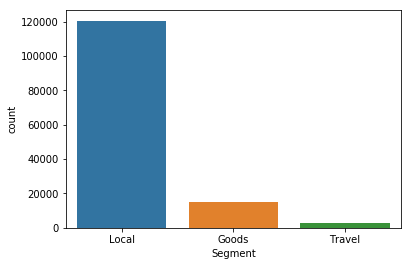

Local     120576
Goods      15234
Travel      2724
Name: Segment, dtype: int64

In [6]:
sns.countplot(data.Segment)
plt.show();

display(data.Segment.value_counts())

The local segment is by far the largest segment.

__Feature Engineering__

In [7]:
#create features for the start month and start year
data['MonthStart'] = data['Start Date'].dt.month
data['YearStart'] = data['Start Date'].dt.year

In [8]:
data.head()

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type,MonthStart,YearStart
0,gr-millevois-tire-service-center,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-millevois-tire...,Local,Third - Party,11,2011
1,gr-manakeesh-cafe-bakery,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-manakeesh-cafe...,Local,Third - Party,11,2011
2,gr-phoenix-salon-and-spa,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-phoenix-salon-...,Local,Third - Party,11,2011
3,gr-hands-in-motion,0.0,0.0,2011-11-21,http://www.groupon.com/deals/gr-hands-in-motion,Local,Third - Party,11,2011
4,dc-fd2-bartending-college-allentown-reading,86.8,4253.2,2012-06-06,http://www.groupon.com/deals/dc-fd2-bartending...,Local,Third - Party,6,2012


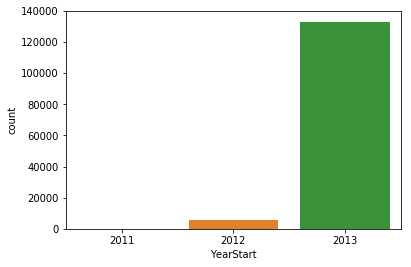

2013    133077
2012      5453
2011         4
Name: YearStart, dtype: int64

In [9]:
sns.countplot(data.YearStart)
plt.show();

display(data.YearStart.value_counts())

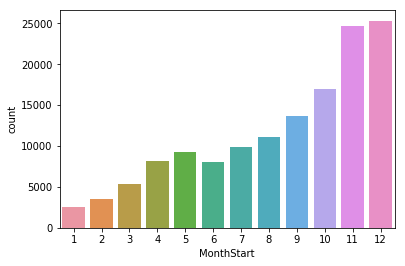

In [10]:
sns.countplot(data.MonthStart)
plt.show();

There are deals from every month of the year located in the data. This is because the start data indicated in the data doesn't necessarily indicate when billing occured; billings are only counted during the actual months they are active. Therefore, a deal may have been started in January but still be active in November or December. 

__Imputation__

My imputation strategy will be to use the average total billings per day in the Local segment and in October for the missing days in October. Instead of creating new records for the missing days, I will add the total missing value to my final calculations.

In [11]:
#create a df with only deals that start in Oct 2013
October_local = data[(data.MonthStart == 10) & (data.YearStart == 2013) & (data.Segment == 'Local')]

In [12]:
October_local.head()

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type,MonthStart,YearStart
42763,the-ugly-sweater-run-2,0.00,0.0000,2013-10-02,http://www.groupon.com/deals/the-ugly-sweater-...,Local,Third - Party,10,2013
44443,michael-smith-photography-1,0.00,0.0000,2013-10-05,http://www.groupon.com/deals/michael-smith-pho...,Local,Third - Party,10,2013
44988,niagara-fun-tours-54,0.00,0.0000,2013-10-16,http://www.groupon.com/deals/niagara-fun-tours-54,Local,Third - Party,10,2013
46275,elegant-looks,29.15,416.5000,2013-10-06,http://www.groupon.com/deals/elegant-looks,Local,Third - Party,10,2013
47265,idle-hour-ranch,60.55,976.8945,2013-10-01,http://www.groupon.com/deals/idle-hour-ranch,Local,Third - Party,10,2013


In [13]:
#find the total billings by day, represented by t
t = October_local.groupby('Start Date').Billings.sum()
display(t) 

Start Date
2013-10-01    3.140574e+06
2013-10-02    3.010398e+06
2013-10-03    4.266867e+06
2013-10-04    3.538083e+06
2013-10-05    1.687881e+06
2013-10-06    1.632563e+06
2013-10-07    2.771953e+06
2013-10-08    3.412731e+06
2013-10-09    3.222805e+06
2013-10-10    3.866735e+06
2013-10-11    3.015991e+06
2013-10-12    1.994842e+06
2013-10-13    1.519141e+06
2013-10-14    3.475041e+06
2013-10-15    3.501416e+06
2013-10-16    4.072212e+06
2013-10-17    4.507996e+06
2013-10-18    2.991175e+06
2013-10-19    2.477089e+06
2013-10-31    3.485813e+06
Name: Billings, dtype: float64

As you can see above, there are 11 days missing from the data.

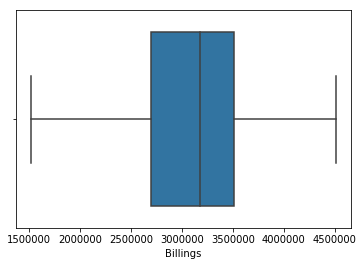

Total billings accounted for in October: 61591306.80899994
The average daily billings in October: 3079565.340449997
The median billing amount during this time: 3181689.6372499964


In [14]:
#check for outliers using a boxplot
sns.boxplot(t)
plt.show();

#calculate some descriptive stats about t
print('Total billings accounted for in October: {}'.format(sum(t)))
print('The average daily billings in October: {}'.format(np.mean(t)))
print('The median billing amount during this time: {}'.format(np.median(t)))

The cell above illuminates two key finding. First, there are no outliers in the daily totals. Second, and more importantly, it tells us the average daily billings.

In [15]:
# create a variable for average daily billings during October
adb = np.mean(t)

#missing billings for 11 days is the adb * 11
missing_billings = adb *11

print('Total Missing Billings in October: {}'.format(missing_billings))
print('Total October Billings: {}'.format(t.sum()+missing_billings))

Total Missing Billings in October: 33875218.74494997
Total October Billings: 95466525.5539499


__Estimates__

In [16]:
#create a dataframe using only the total billings by segment
c = pd.DataFrame(data.groupby(['Segment']).Billings.sum())

#reset the index
c.reset_index(inplace=True)

display(c)

#create a variable for the sum of the total billings
tb = c.Billings.sum()

print('Total billings represented in the data: {}'.format(tb))

,Segment,Billings
0,Goods,2.822457e+08
1,Local,4.092227e+08
2,Travel,7.055206e+07


Total billings represented in the data: 762020391.1478682


In [17]:
#add missing billings back 
c.loc[1,'Billings'] += missing_billings

display(c)

print('Total billings including the missing billings: {}'.format(tb+missing_billings))

,Segment,Billings
0,Goods,2.822457e+08
1,Local,4.430979e+08
2,Travel,7.055206e+07


Total billings including the missing billings: 795895609.8928181


In [18]:
#create a table to display estimates against some wall street projections
Estimates_df = pd.DataFrame(columns=['Travel','Goods','Local','2013Q4','FullYear'],
                           index=['ME','JPM','MS','Street Consensus'])

tvl = [70.552,71.02,67,69.01,]
gds = [282.2457,275.716,295,285.358]
lcl = [443.0988,490.142,508,499.071]
q4 = [795.896,836.878,870,853.439]
fy = [2854.419,2895.401,3029,2928.733]


Estimates_df.Travel = tvl
Estimates_df.Goods = gds
Estimates_df.Local = lcl
Estimates_df['2013Q4'] = q4
Estimates_df.FullYear = fy

Estimates_df

,Travel,Goods,Local,2013Q4,FullYear
ME,70.552,282.2457,443.0988,795.896,2854.419
JPM,71.020,275.7160,490.1420,836.878,2895.401
MS,67.000,295.0000,508.0000,870.000,3029.000
Street Consensus,69.010,285.3580,499.0710,853.439,2928.733


# Challenge 2: Removing Duplicate Deals

The second challenge is to find and remove duplicate deals from the specified data file.
A duplicate is defined as two (or more) deals that have distinct urls but that offer the same good or service and have underlying purchase counts coming from the same source. 

In [19]:
data = pd.read_excel('gdeals.xlsx')

data.head()

,Deal URL,Quantity Sold,Price,Observation Time
0,http://www.groupon.be/deals/vlaams-brabant/col...,3,39.99,2015-03-30 22:37:23
1,http://www.groupon.be/deals/antwerpen/ga-hotel...,0,289.00,2015-03-30 04:45:55
2,http://www.groupon.be/deals/deal-national/grou...,6,74.95,2015-03-30 02:18:35
3,http://www.groupon.be/deals/brussel/clinica-ae...,260,39.00,2015-03-31 02:36:10
4,http://www.groupon.be/deals/antwerpen_fr/iduna...,2,119.99,2015-03-31 22:38:39


In [20]:
data.shape

(74491, 4)

Based on the definition, we know duplicates will have the same quantity sold and price. Therefore, I will look at the URLs to determine what makes a deal a duplicate. URLs are structured so it is easy to spot similarities amongst them if there are any.

Using urlparse splits the URLs into its basic components; only the paths are imortant because they are what makes the url unique.

__Feature Engineering__

In [21]:
from urllib.parse import urlparse

In [22]:
#test urlparse
url = 'http://www.groupon.be/deals/vlaams-brabant/color-nails-1-1/44331719'

test = urlparse(url)

test

ParseResult(scheme='http', netloc='www.groupon.be', path='/deals/vlaams-brabant/color-nails-1-1/44331719', params='', query='', fragment='')

In [23]:
#create an empty list to hold url_paths
url_paths = []

#use a for loop to extract paths from each deal
for i in data['Deal URL']:
    p = urlparse(i).path
    #add each path to the url_paths list
    url_paths.append(p)

#create a feature that holds the url paths 
data['url_path'] = url_paths

In [24]:
data.head()

,Deal URL,Quantity Sold,Price,Observation Time,url_path
0,http://www.groupon.be/deals/vlaams-brabant/col...,3,39.99,2015-03-30 22:37:23,/deals/vlaams-brabant/color-nails-1-1/44331719
1,http://www.groupon.be/deals/antwerpen/ga-hotel...,0,289.00,2015-03-30 04:45:55,/deals/antwerpen/ga-hotel-de-stokerij/57111009
2,http://www.groupon.be/deals/deal-national/grou...,6,74.95,2015-03-30 02:18:35,/deals/deal-national/groupon-goods-global-gmbh...
3,http://www.groupon.be/deals/brussel/clinica-ae...,260,39.00,2015-03-31 02:36:10,/deals/brussel/clinica-aesthetica/29741756
4,http://www.groupon.be/deals/antwerpen_fr/iduna...,2,119.99,2015-03-31 22:38:39,/deals/antwerpen_fr/iduna-1/41429518


The way these URL paths are structured is the following: <ul>
    <li>Segment --> City --> ID --> Unique Code </li> </ul>

In [25]:
#create an empty list for store deal_ids
deal_ids = []

#run a loop to extract each deal_id
for i in data.url_path:
    p = i.split('/')
    d = p[3]
    #add each deal_id to the deal_ids list
    deal_ids.append(d)
    
#create a new feature using the deal_ids
data['deal_id'] = deal_ids

data.head()

,Deal URL,Quantity Sold,Price,Observation Time,url_path,deal_id
0,http://www.groupon.be/deals/vlaams-brabant/col...,3,39.99,2015-03-30 22:37:23,/deals/vlaams-brabant/color-nails-1-1/44331719,color-nails-1-1
1,http://www.groupon.be/deals/antwerpen/ga-hotel...,0,289.00,2015-03-30 04:45:55,/deals/antwerpen/ga-hotel-de-stokerij/57111009,ga-hotel-de-stokerij
2,http://www.groupon.be/deals/deal-national/grou...,6,74.95,2015-03-30 02:18:35,/deals/deal-national/groupon-goods-global-gmbh...,groupon-goods-global-gmbh
3,http://www.groupon.be/deals/brussel/clinica-ae...,260,39.00,2015-03-31 02:36:10,/deals/brussel/clinica-aesthetica/29741756,clinica-aesthetica
4,http://www.groupon.be/deals/antwerpen_fr/iduna...,2,119.99,2015-03-31 22:38:39,/deals/antwerpen_fr/iduna-1/41429518,iduna-1


Although you can parse the urls by simply using the split method, it is good practice to extract the path first to understand how the path is structured. 

Now I can alter the definition of "duplicate" as being any deal with the same quantity sold, price and unique deal id.

In [26]:
#check how many duplicated deals there are
dp = data.duplicated(['Quantity Sold','Price','deal_id']).sum()

print('%0.2f percent of the data are duplicates.'%((dp / data.shape[0]) * 100))

79.70 percent of the data are duplicates.


In [27]:
#create a new df of only unique deals
valid = data.drop_duplicates(['Quantity Sold','Price','deal_id'], keep='last')

valid.head()

,Deal URL,Quantity Sold,Price,Observation Time,url_path,deal_id
4,http://www.groupon.be/deals/antwerpen_fr/iduna...,2,119.99,2015-03-31 22:38:39,/deals/antwerpen_fr/iduna-1/41429518,iduna-1
23,http://www.groupon.be/deals/dealbank_nl_be/no-...,13,259.99,2015-03-31 22:13:05,/deals/dealbank_nl_be/no-hair-studio/28764592,no-hair-studio
27,http://www.groupon.be/deals/groupon-voyages/ga...,0,55.00,2015-03-31 03:13:44,/deals/groupon-voyages/ga-hotel-le-riquewihr-1...,ga-hotel-le-riquewihr-11
90,http://www.groupon.be/deals/groupon-voyages/ga...,0,35.00,2015-03-31 08:35:59,/deals/groupon-voyages/ga-hotel-marrakech-le-s...,ga-hotel-marrakech-le-semiramis-9
111,http://www.groupon.be/deals/nationale-deal/per...,16,13.95,2015-03-31 01:11:15,/deals/nationale-deal/personalgifts/30379502,personalgifts
